# Mushroom Project

In [1]:
#IMPORT THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import sklearn
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# CREATE A DATAFRAME FROM THE GIVEN CSV
df= pd.read_csv('mushrooms.csv')
df.head() # LETS SEE THE FIRST 5 ROWS OF DATA

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Lets check the shape of data
df.shape

(8124, 23)

In [4]:
# Lets check the type of data, none is numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
df['class'].value_counts() # Almost Balanced Data

e    4208
p    3916
Name: class, dtype: int64

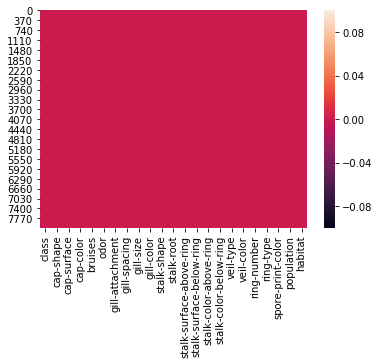

In [6]:
sns.heatmap(df.isnull())  # lets check missing values

In [7]:
df.isnull().sum()  # Lets confirm the missing values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df.describe() # Lets do the decriptive statistics

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
# Lets seperate the target and features
x = df.drop(['class'],axis=1)
y=df[['class']]


In [10]:
x.shape

(8124, 22)

In [11]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [12]:
y.head

<bound method NDFrame.head of      class
0        p
1        e
2        e
3        p
4        e
5        e
6        e
7        e
8        p
9        e
10       e
11       e
12       e
13       p
14       e
15       e
16       e
17       p
18       p
19       p
20       e
21       p
22       e
23       e
24       e
25       p
26       e
27       e
28       e
29       e
...    ...
8094     e
8095     p
8096     e
8097     p
8098     p
8099     e
8100     e
8101     p
8102     e
8103     e
8104     e
8105     e
8106     e
8107     e
8108     p
8109     e
8110     e
8111     e
8112     e
8113     p
8114     p
8115     e
8116     p
8117     p
8118     p
8119     e
8120     e
8121     e
8122     p
8123     e

[8124 rows x 1 columns]>

In [13]:
# as all the features are non numeric lets do one hot encoding
x1=pd.get_dummies(x)
x1.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
x1.shape

(8124, 117)

In [15]:
# lets scale the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x2=sc.fit_transform(x1)
x3=pd.DataFrame(x2,columns=x1.columns)

In [16]:
x3.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
1,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582
2,4.119885,-0.022195,-0.79621,-0.336878,-0.062885,-0.904579,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,5.178988,-0.404842,-0.217824,-0.155582
3,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,-0.677534,1.226505,...,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
4,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582


In [17]:
# Lets import the required models and metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [18]:
# Lets create a list of models to be evaluated
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [19]:
#Let us check which model will perform well on the given data on the basis of mean crossval score and its std dev
results = []
names = []
for name, model in models:
        cv_results = cross_val_score(model, x3, y, cv=5, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.948796 (0.063517)
KNN: 0.931806 (0.084423)
DT: 0.996306 (0.005724)
NB: 0.867534 (0.092990)
SVM: 0.875287 (0.171601)


In [20]:
# We can see Decision tree is performing best so lets find best random state for same
DT=DecisionTreeClassifier()
max_accuracy=0
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x3,y,test_size=0.2, random_state=i)
    DT.fit(X_train,y_train)
    ypred=DT.predict(X_test)
    accuracy=accuracy_score(y_test, ypred)
    print('At random state ', i, 'the value of accuracy is ', accuracy)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        finalstate=i
print()
print()
print('max accuracy is', max_accuracy,'at random state' , finalstate)

At random state  1 the value of accuracy is  1.0
At random state  2 the value of accuracy is  1.0
At random state  3 the value of accuracy is  1.0
At random state  4 the value of accuracy is  1.0
At random state  5 the value of accuracy is  1.0
At random state  6 the value of accuracy is  1.0
At random state  7 the value of accuracy is  1.0
At random state  8 the value of accuracy is  1.0
At random state  9 the value of accuracy is  1.0
At random state  10 the value of accuracy is  1.0
At random state  11 the value of accuracy is  0.9987692307692307
At random state  12 the value of accuracy is  1.0
At random state  13 the value of accuracy is  1.0
At random state  14 the value of accuracy is  1.0
At random state  15 the value of accuracy is  1.0
At random state  16 the value of accuracy is  1.0
At random state  17 the value of accuracy is  1.0
At random state  18 the value of accuracy is  1.0
At random state  19 the value of accuracy is  1.0
At random state  20 the value of accuracy is

In [21]:
# Lets build our final model on selected random stae
X_train, X_test, y_train,y_test = train_test_split(x3,y,test_size =0.2, random_state = 45)
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

In [22]:
#Lets print confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print('confusion matrix = ',confusion_matrix(y_test,y_pred))
print('classification report = ',classification_report(y_test,y_pred))

confusion matrix =  [[853   0]
 [  0 772]]
classification report =                precision    recall  f1-score   support

           e       1.00      1.00      1.00       853
           p       1.00      1.00      1.00       772

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [23]:
# Lets dump our created model in to pkl file
from sklearn.externals import joblib
joblib.dump(dt,'dt_mushroom.pkl')

['dt_mushroom.pkl']